In [1]:
import tensorflow as tf
from numpy import unique, argmax
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

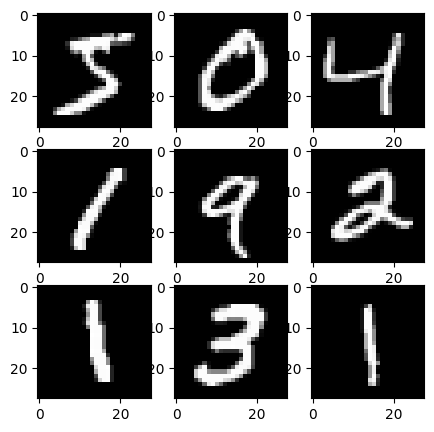

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for i in range(9):
	# define subplot
	plt.subplot(3, 3, i+1)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
# Data Preprocessing

# Single channel
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

# Normalization Imgae data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# One hot encoding
# y_train = tf.keras.utils.to_categorical(y_train, 10)
# y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
in_shape = x_train.shape[1:]
n_classes = len(unique(y_train))

In [15]:
print(in_shape)

(28, 28, 1)


In [6]:
# Define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Fit the model
hist = model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1, validation_split=0.3)

Epoch 1/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.7830 - loss: 0.6722 - val_accuracy: 0.9611 - val_loss: 0.1298
Epoch 2/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.9384 - loss: 0.2043 - val_accuracy: 0.9741 - val_loss: 0.0870
Epoch 3/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9583 - loss: 0.1390 - val_accuracy: 0.9777 - val_loss: 0.0756
Epoch 4/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9680 - loss: 0.1046 - val_accuracy: 0.9799 - val_loss: 0.0667
Epoch 5/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 224s 683ms/step - accuracy: 0.9708 - loss: 0.0939 - val_accuracy: 0.9816 - val_loss: 0.0626


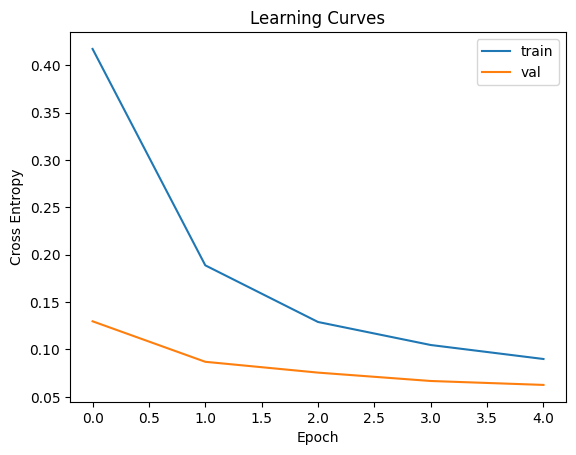

In [8]:
# Plot Learning Curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
plt.show()

In [9]:
loss, acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9787 - loss: 0.0634


In [10]:
acc

0.9825000166893005

In [11]:
pred = argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [12]:
pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

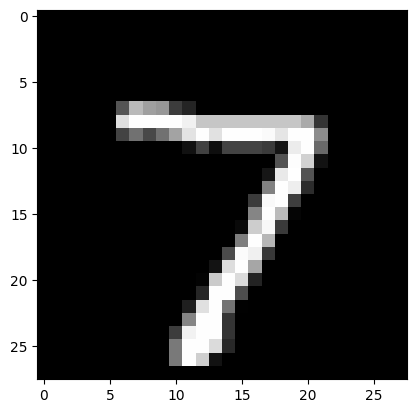

In [13]:
plt.imshow(x_test[0], cmap=plt.get_cmap('gray'))

## Saving the best model

In [14]:
model.save("mnist.model.keras")